<a href="https://colab.research.google.com/github/ANMOLC00/ANMOLC00/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   GallonsPer100Miles  GallonsPer100MilesTo1981   MPG  Cylinders  \
0            5.555556                  5.555556  18.0          8   
1            6.666667                  6.666667  15.0          8   
2            5.555556                  5.555556  18.0          8   
3            6.250000                  6.250000  16.0          8   
4            5.882353                  5.882353  17.0          8   

   Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  Year  \
0               3.07           1.30         3.504          12.0    70   
1               3.50           1.65         3.693          11.5    70   
2               3.18           1.50         3.436          11.0    70   
3               3.04           1.50         3.433          12.0    70   
4               3.02           1.40         3.449          10.5    70   

   Year70To81  Origin  Origin.Eq.1  Origin.Eq.2  Origin.Eq.3  \
0           1       1            1            0            0   
1           1       1   

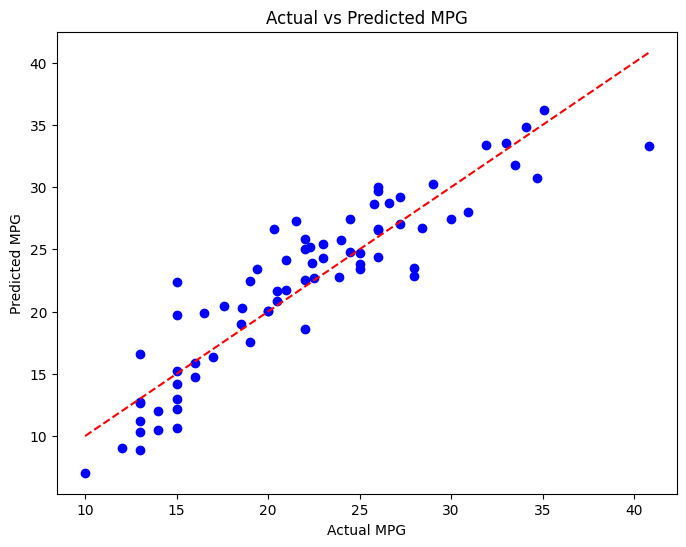

In [13]:
# Linear Regression to Predict Car's Fuel Consumption

# Step 1: Install & Import Necessary Libraries
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load the dataset
file_path = '/AutoMPGmodels.xlsx'  # Change path if necessary
df = pd.read_excel(file_path)

# Step 3: Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Preprocessing
# Let's check for missing values
print(df.isnull().sum())

# Optionally: Fill missing values or drop them
df = df.dropna()  # For simplicity

# Assume 'MPG' is the target (fuel consumption)
# Identify numerical and categorical features
numerical_features = ['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60', 'Year']  # Example
categorical_features = ['Origin']  # Country of origin

# Adjust columns based on your dataset structure after inspecting df.head()

# Step 5: Define X and y
X = df[numerical_features + categorical_features]
y = df['MPG']  # Target variable

# Step 6: Build a Preprocessing + Modeling Pipeline
# For categorical columns, we use OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Predict
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 11: Plot Predictions vs True values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()
